In [1]:
# SH-I

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
lectins = ['ACG', 'CTB', 'DC_SIGN', 'Gal4', 'LCA', 'MAL', 'NPL', 'PSA', 'SBA', 'SNL', 'UEA']

In [4]:
def align(lectin, save = False):

    cfg = pd.read_excel('figures/cfg/CFG_' + lectin + '.xls')
    liga = pd.read_csv('figures/liga/LiGA_' + lectin + '.csv')

    order = pd.read_csv('figures/order.csv')

    cfg_glycans = pd.read_csv('figures/cfg_glycans.csv')
    liga_glycans = pd.read_csv('figures/liga_glycans.csv')

    assert len(cfg['Structure on Masterlist']) == 611, 'Not the same length bruh.'
    cfg['IUPAC (CFG)'] = cfg_glycans['IUPAC'].values
    liga_dict = dict(zip(liga_glycans['Glycan'], liga_glycans['IUPAC']))
    liga['IUPAC (LiGA)'] = liga['Mod'].map(liga_dict)

    cfg = cfg[['IUPAC (CFG)', 'Average RFU', 'StDev']]
    liga = liga[['IUPAC (LiGA)', 'total']]

    cfg_dict_rfu = dict(zip(cfg['IUPAC (CFG)'], cfg['Average RFU']))
    cfg_dict_std = dict(zip(cfg['IUPAC (CFG)'], cfg['StDev']))
    liga_dict = dict(zip(liga['IUPAC (LiGA)'], liga['total']))

    order['total'] = order['IUPAC (LiGA)'].map(liga_dict)
    order['Average RFU'] = order['IUPAC (CFG)'].map(cfg_dict_rfu)
    order['StDev'] = order['IUPAC (CFG)'].map(cfg_dict_std)
    aligned = order[['IUPAC (LiGA)', 'total', 'IUPAC (CFG)', 'Average RFU', 'StDev']]
    aligned.iloc[-1, 3:] = aligned.iloc[-1, 3:].fillna(0)
    
    if save:
        
        aligned.to_csv('figures/outputs/' + lectin + '.csv', index = False)
    
    return aligned

In [5]:
def top(lectin, save = False):
    
    cfg = pd.read_excel('figures/cfg/CFG_' + lectin + '.xls')
    cfg_glycans = pd.read_csv('figures/cfg_glycans.csv')

    assert len(cfg['Structure on Masterlist']) == 611, 'Not the same length bruh.'
    cfg['IUPAC (CFG)'] = cfg_glycans['IUPAC'].values
    cfg = cfg.sort_values('Average RFU', ascending = False)

    cfg['Norm'] = norm(cfg['Average RFU'].values)

    top = cfg[cfg['Norm'] > 0.2]
    top = top[['IUPAC (CFG)', 'Average RFU', 'StDev']]
    top = top.sort_index()
    top = top.reset_index(drop = True)
    
    if save:
        
        top.to_csv('figures/outputs/' + lectin + '_top.csv', index = False)
    
    return top

In [6]:
def plot(lectin, save = False):
    
    top_hits = top(lectin)
    x = top_hits['IUPAC (CFG)']
    y = top_hits['Average RFU']
    e = top_hits['StDev']
    i = np.arange(len(x))

    plt.figure(figsize = (len(i) / 3, 5))
    plt.bar(i, y, yerr = e, capsize = 3, color = 'black')
    plt.xlabel('glycans')
    plt.ylabel('RFUs (CFG)')
    plt.xticks(i, x, rotation = 'vertical')
    plt.grid(True, axis = 'x')
    plt.title(lectin + ' Top Hits')
    ymin, ymax = plt.gca().get_ylim()

    if save:

        plt.savefig(fname = 'figures/' + lectin + '_top.pdf', bbox_inches = 'tight')

    else:

        plt.show()
    
    aligned = align(lectin)
    
    aligned['IUPAC (LiGA)'] = aligned['IUPAC (LiGA)'].fillna('')
    aligned['IUPAC (CFG)'] = aligned['IUPAC (CFG)'].fillna('')
    
    x1, y1 = aligned['IUPAC (LiGA)'], aligned['total']
    x2, y2, e2 = aligned['IUPAC (CFG)'], aligned['Average RFU'], aligned['StDev']

    i1 = np.arange(len(x1))
    i2 = np.arange(len(x2))
    
    fig, (ax1, ax2) = plt.subplots(2, figsize = (20, 10))
    
    fig.text(0.915, 0.5, lectin, fontsize = 15, rotation = 270)

    ax1.bar(i1, y1, color = 'black')
    ax1.xaxis.tick_top() 
    plt.sca(ax1)
    plt.ylabel('Enrichment (LiGA)')
    plt.xticks(i1, x1, rotation = 'vertical')
    plt.grid(True, axis = 'x')

    ax2.bar(i2, y2, yerr = e2, capsize = 3, color = 'black')
    plt.sca(ax2)
    plt.xlabel('glycans')
    plt.ylabel('RFUs (CFG)')
    plt.xticks(i2, x2, rotation = 'vertical')
    plt.ylim(top = ymax)
    plt.grid(True, axis = 'x')

    plt.subplots_adjust(hspace = 0.05)
    
    if save:
        
        plt.savefig(fname = 'figures/' + lectin + '_main.pdf', bbox_inches = 'tight')
    
    else:
        
        plt.show()

In [7]:
def plot_final(lectin, save = False):
    
    aligned = pd.read_csv('figures/outputs/' + lectin + '.csv')
    
    aligned['IUPAC (LiGA)'] = aligned['IUPAC (LiGA)'].fillna('')
    aligned['IUPAC (CFG)'] = aligned['IUPAC (CFG)'].fillna('')
    
    x1, y1 = aligned['IUPAC (LiGA)'], aligned['total']
    x2, y2, e2 = aligned['IUPAC (CFG)'], aligned['Average RFU'], aligned['StDev']

    i1 = np.arange(len(x1))
    i2 = np.arange(len(x2))
    
    fig, (ax1, ax2) = plt.subplots(2, figsize = (20, 10))
    
    fig.text(0.915, 0.5, lectin, rotation = 270)

    ax1.bar(i1, y1, color = 'black', zorder = 3)
    ax1.xaxis.tick_top() 
    plt.sca(ax1)
    plt.ylabel('Enrichment (LiGA)')
    plt.xticks(i1, x1, rotation = 'vertical')
    plt.grid(True, axis = 'x')

    ax2.bar(i2, y2, yerr = e2, capsize = 3, color = 'black', zorder = 3)
    plt.sca(ax2)
    plt.xlabel('Glycans')
    plt.ylabel('Average RFUs (CFG)')
    plt.xticks(i2, x2, rotation = 'vertical')
    plt.grid(True, axis = 'x', zorder = 0)

    plt.subplots_adjust(hspace = 0.05)
    
    if save:
        
        plt.savefig(fname = 'figures/final/' + lectin + '.pdf', bbox_inches = 'tight')
    
    else:
        
        plt.show()

In [8]:
def norm(arr):
    
    p = (arr - arr.min())
    q = arr.max() - arr.min()
    
    return p / q

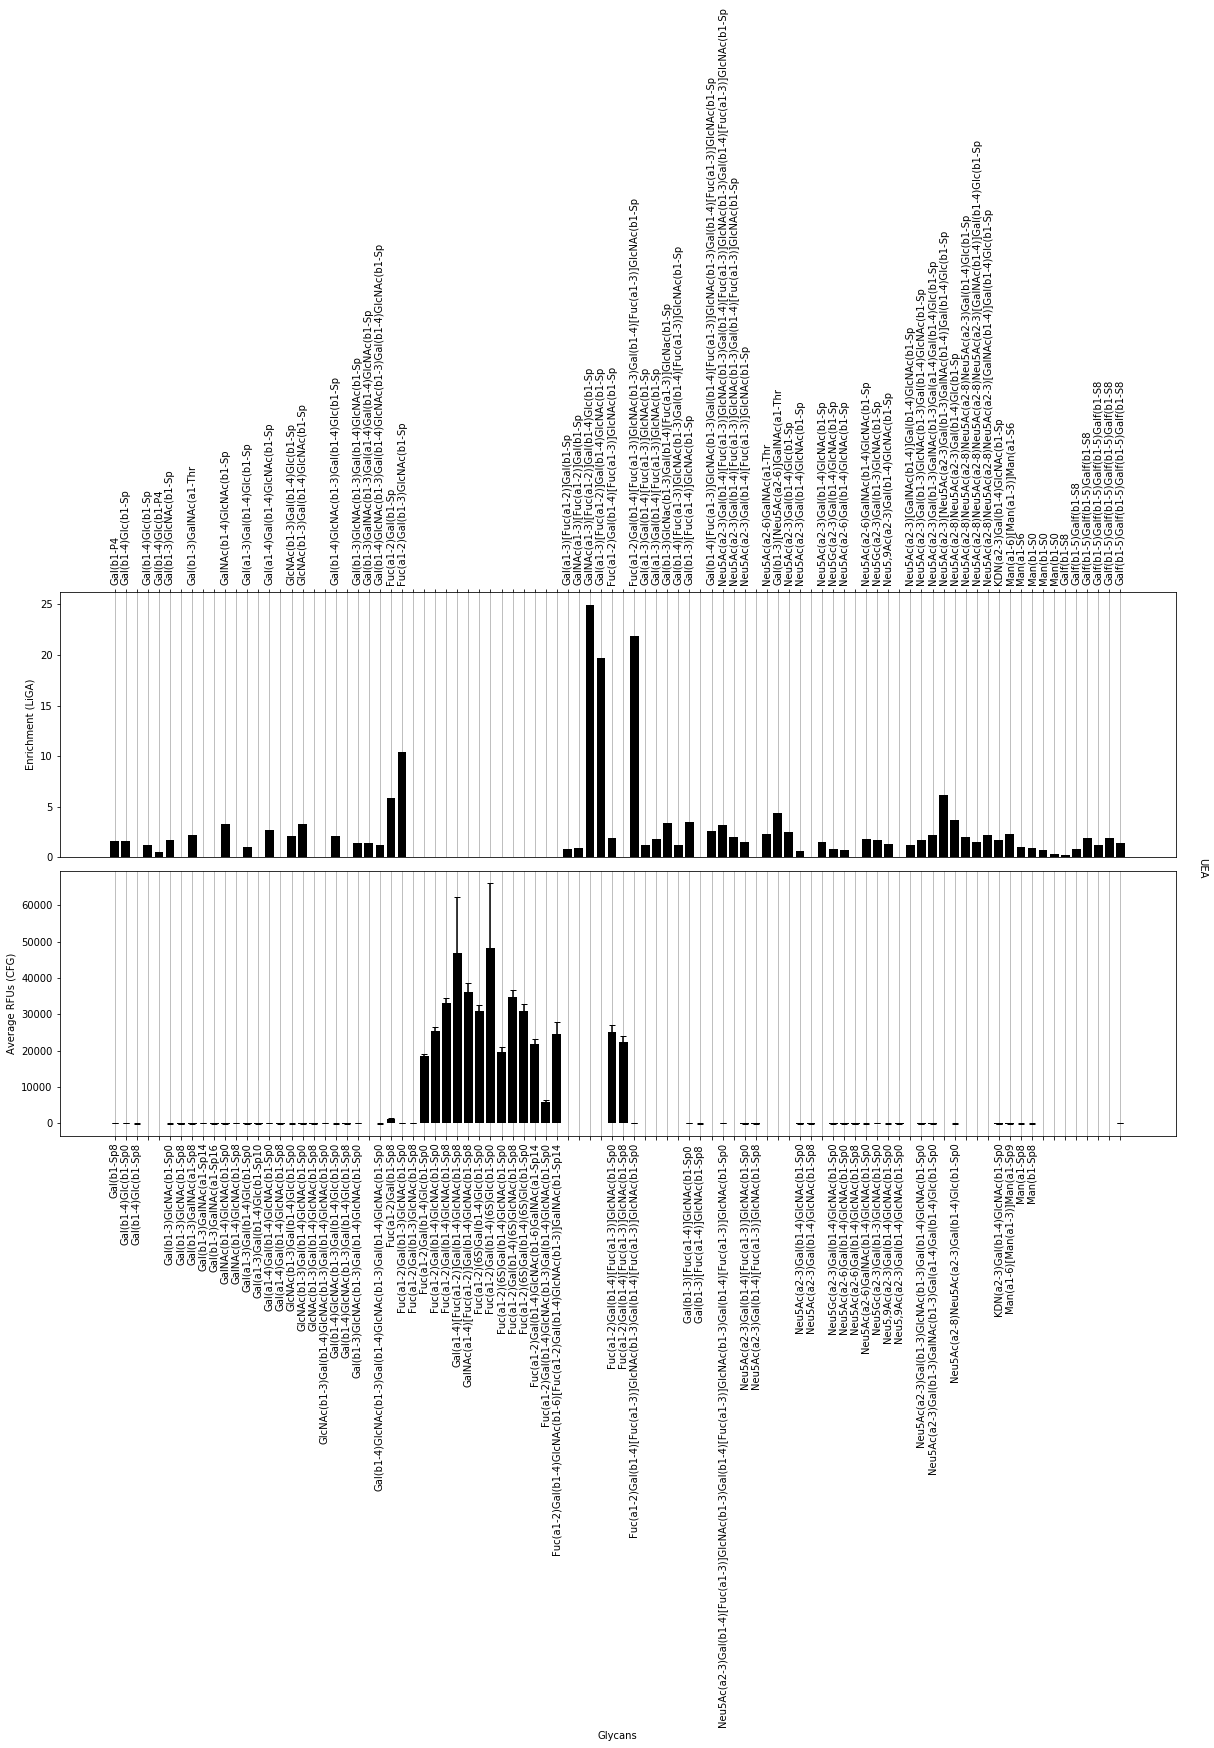

In [9]:
plot_final('UEA', save = True)